In [438]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


In [439]:
# Load a picture to check the shape and indicate the path to the data folder
img = mpimg.imread(r"C:\Users\Dell\Downloads\archive (1)\data\SeaLake_1.jpg")
image_dir = "C:/Users/Dell/Downloads/archive (1)/data"

img.shape 

(64, 64, 3)

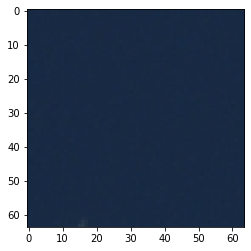

In [440]:
plt.imshow(img)

In [441]:
img_shape = img.shape
IMG_SIZE = img.shape[0]
CHANNELS = img_shape[2]
BATCH_SIZE = 64

print(IMG_SIZE )
print(CHANNELS )

64
3


In [442]:
# Split data into train and test 

train_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                 image_size = (64,64),
                                                                 label_mode = "categorical",
                                                                 batch_size= 32,
                                                                 validation_split = 0.20,
                                                                 seed = 42,
                                                                 subset = "training"
                                                                 )

val_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                 image_size = (64,64),
                                                                 label_mode = "categorical",
                                                                 batch_size= 32,
                                                                 validation_split = 0.20,
                                                                 seed = 42,
                                                                 subset = "validation"
                                                                 )

test_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                image_size = (64,64),
                                                                label_mode = "categorical",
                                                                batch_size = 32
                                                    
                                                                )

#Checking class names 
class_names = train_data.class_names
class_names


Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.
Found 5631 files belonging to 4 classes.


['cloudy', 'desert', 'green_area', 'water']

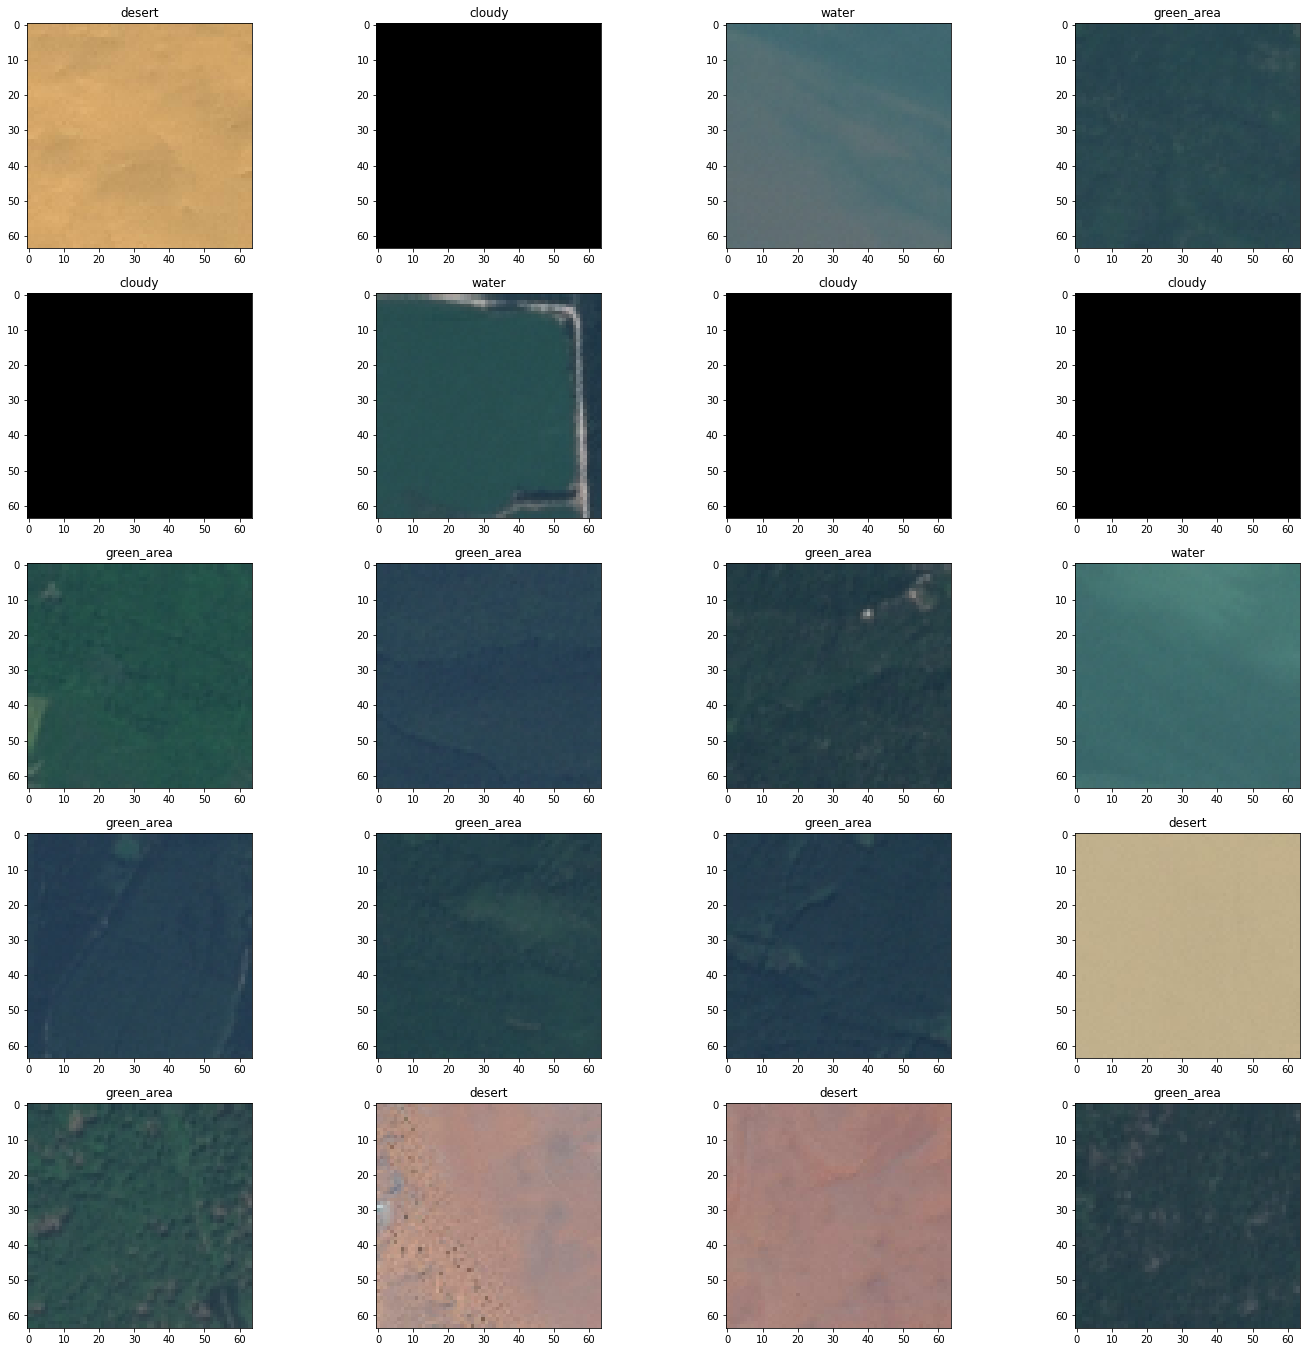

In [443]:
#Displaying the train data sample 

plt.figure(figsize=(24,24))

for image, label in train_data.take(1):
  
  for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(label[i])]) 
    
  

In [444]:
#model inclusion and variables notation 

input_shape = img_shape
n_classes =4
model = Sequential()


In [445]:
# leyers of Neural network 

model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,  kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,  kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(n_classes, "softmax"))

In [446]:
#Compilation of the NN model 

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["categorical_accuracy"])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 2, 2, 64)        

In [448]:
#Learning a neural network

early_stopping = EarlyStopping(monitor="val_categorical_accuracy", patience=10)

history = model.fit(train_data , validation_data= val_data,
          epochs=10,
          callbacks=[early_stopping]
          )



Epoch 1/10
141/141 [==============================] - 12s 77ms/step - loss: 2.4239 - categorical_accuracy: 0.6908 - val_loss: 0.6330 - val_categorical_accuracy: 0.7744
Epoch 2/10
141/141 [==============================] - 11s 76ms/step - loss: 0.2714 - categorical_accuracy: 0.8786 - val_loss: 0.2192 - val_categorical_accuracy: 0.8961
Epoch 3/10
141/141 [==============================] - 11s 76ms/step - loss: 0.1555 - categorical_accuracy: 0.9314 - val_loss: 0.2840 - val_categorical_accuracy: 0.8881
Epoch 4/10
141/141 [==============================] - 12s 82ms/step - loss: 0.2126 - categorical_accuracy: 0.9059 - val_loss: 0.1484 - val_categorical_accuracy: 0.9467
Epoch 5/10
141/141 [==============================] - 11s 78ms/step - loss: 0.1744 - categorical_accuracy: 0.9251 - val_loss: 0.1056 - val_categorical_accuracy: 0.9627
Epoch 6/10
141/141 [==============================] - 11s 79ms/step - loss: 0.1329 - categorical_accuracy: 0.9481 - val_loss: 0.1716 - val_categorical_accuracy:

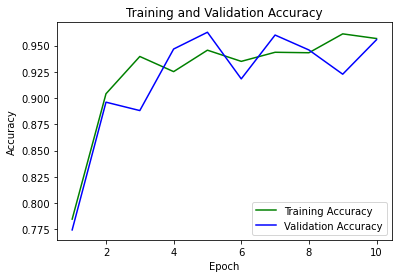

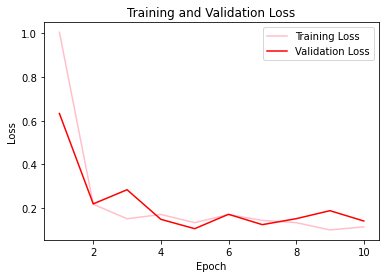

In [449]:
#Result  plot 
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()


#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [454]:
class_name = {0:"cloud",1:"desert" , 2 : 'green_area', 3: 'water'}
y = model.predict(test_data)
y =  np.argmax(y,axis= 1 )
y.shape


(5631,)

In [451]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_data:
  i += 1
  y = np.argmax(model.predict(data), axis=1)
  y_true = np.append(y_true, labels)
  y_pred = np.append(y_pred, y)

In [452]:
print(y_true)
print(y_pred)
print(y_true.shape)
print(y_pred.shape)

[0. 0. 0. ... 0. 0. 0.]
[3. 1. 0. ... 0. 2. 0.]
(22524,)
(5631,)


In [431]:
cm  = confusion_matrix(y_pred,y_true)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

ValueError: Found input variables with inconsistent numbers of samples: [32, 128]

In [453]:

model.evaluate(test_data)


176/176 [==============================] - 7s 38ms/step - loss: 0.1381 - categorical_accuracy: 0.9608


[0.1381140649318695, 0.9607529640197754]

In [169]:
model.save(r"C:\Users\Dell\Downloads\archive (1)")


INFO:tensorflow:Assets written to: C:\Users\Dell\Downloads\archive (1)\data\assets
